# Load packages and data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import pandas as pd
import seaborn as sns
import utils as ut

In [2]:
df = ut.load_clean_data()

# Summer vs Winter Games

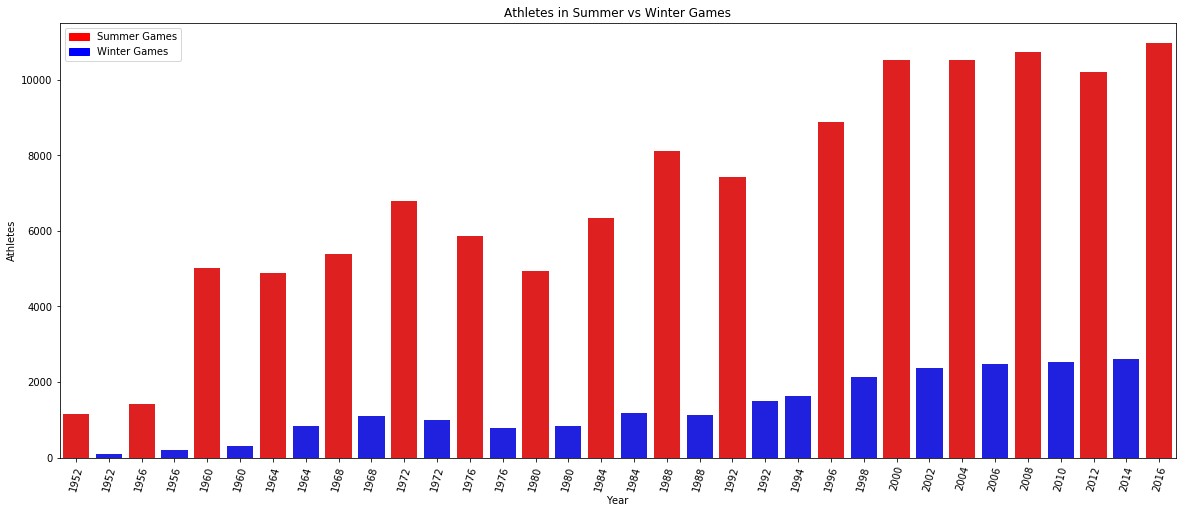

In [3]:
ut.plot_sum_win_games(df)

# Age

/home/nacho/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


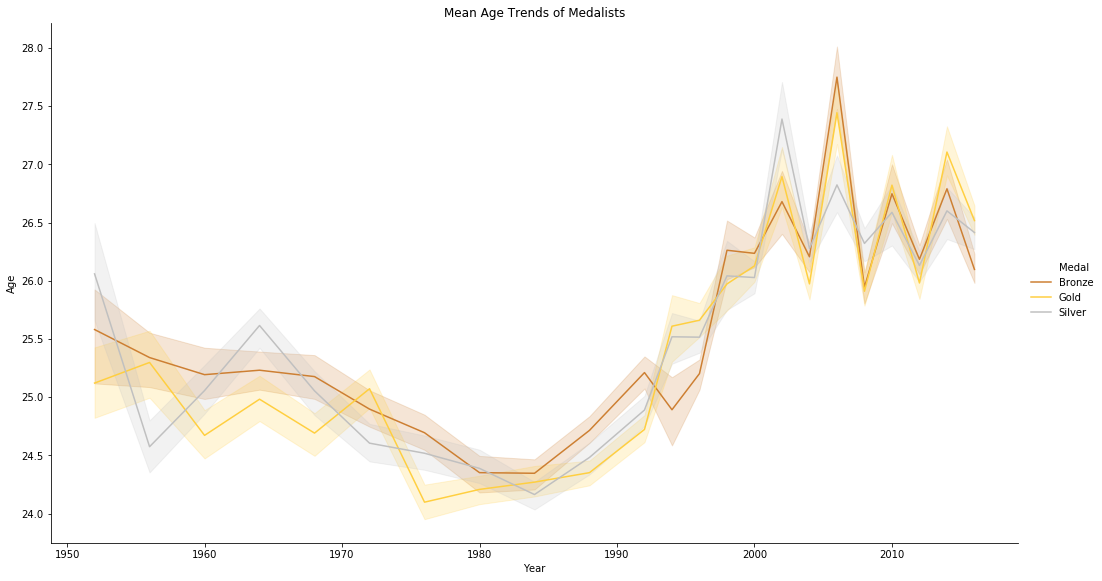

In [4]:
ut.plot_age(df)

# Height/Weight

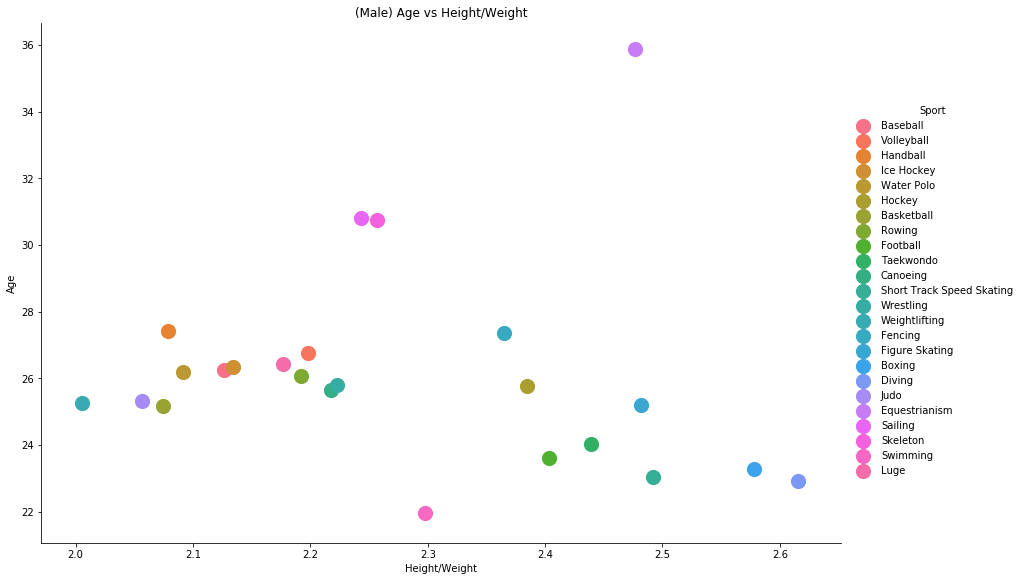

In [5]:
ut.plot_male_age_hw(df)

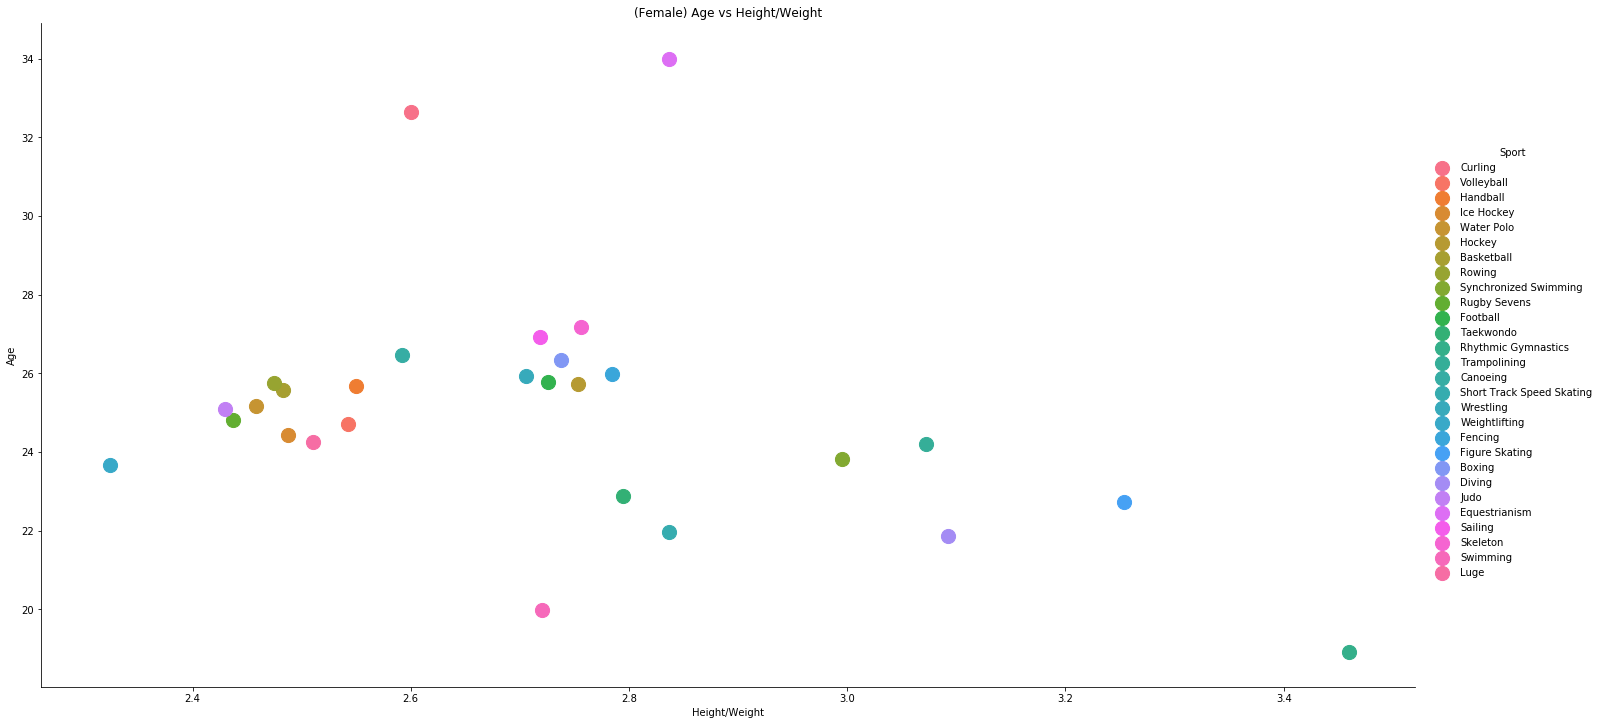

In [6]:
ut.plot_female_age_hw(df)

## Recommend

In [3]:
gender = 'M'
age = 23
h = 177.8  # in cm
w = 68.0389  # in kg
print('Based on your information, we recommend: {}'.format(ut.find_sport(gender, age, h, w, df)))

Based on your information, we recommend: Diving


# Gender

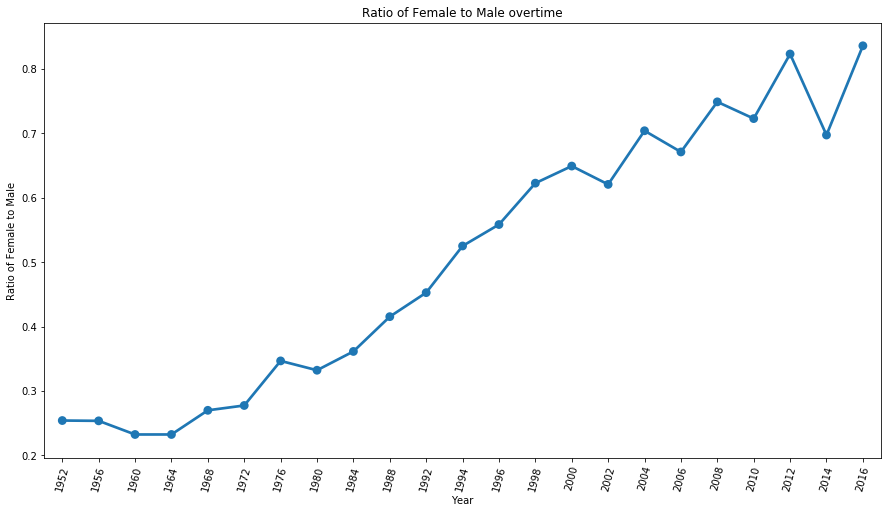

In [7]:
ut.plot_gender(df)

# Country

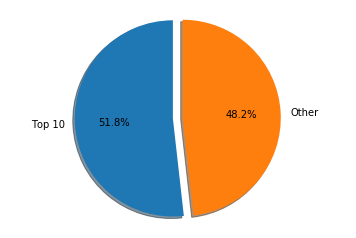

In [8]:
ut.plot_pie_chart(df)

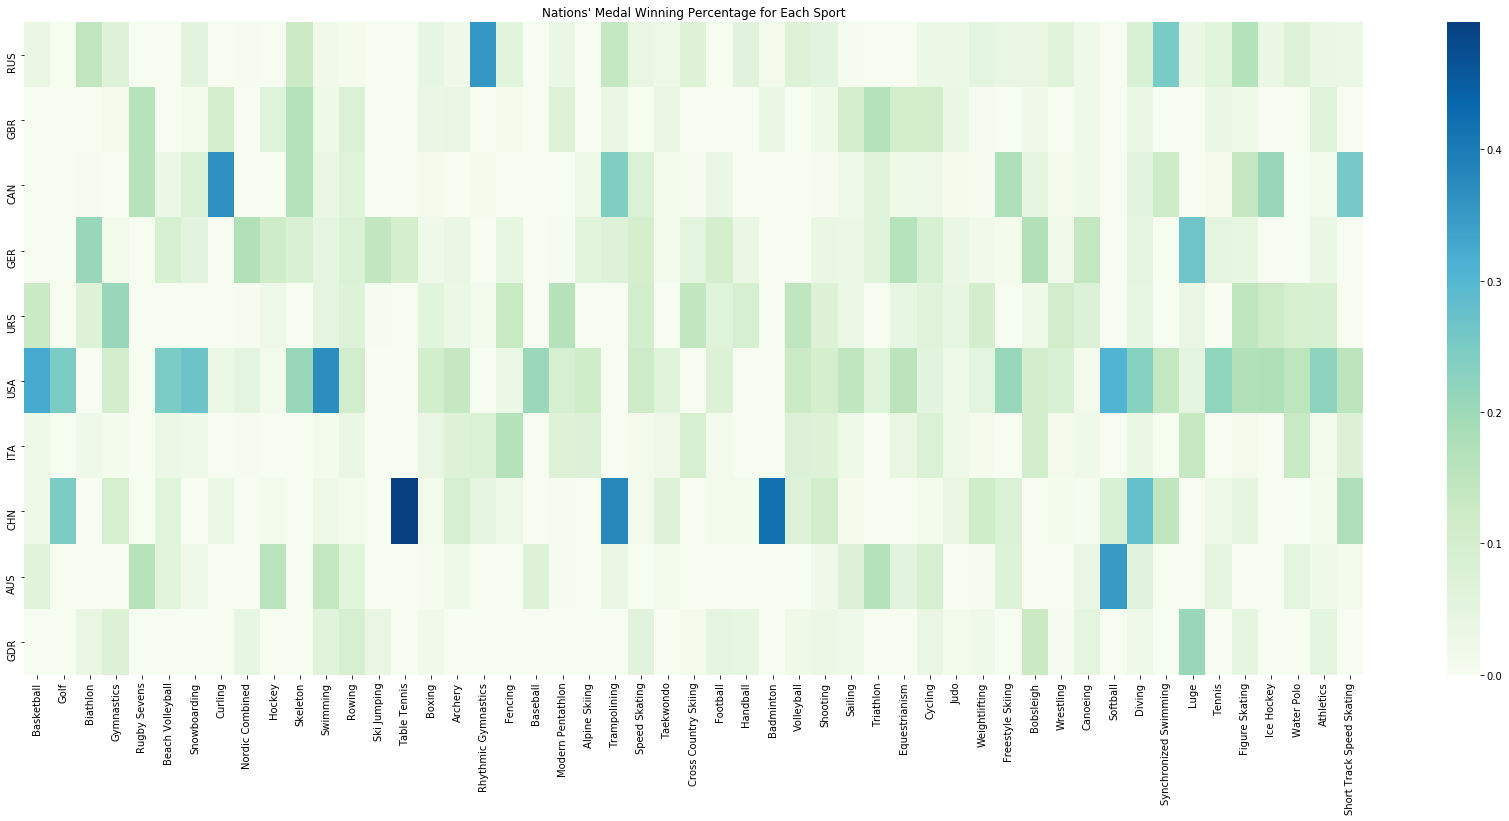

In [9]:
ut.plot_heatmap(df)

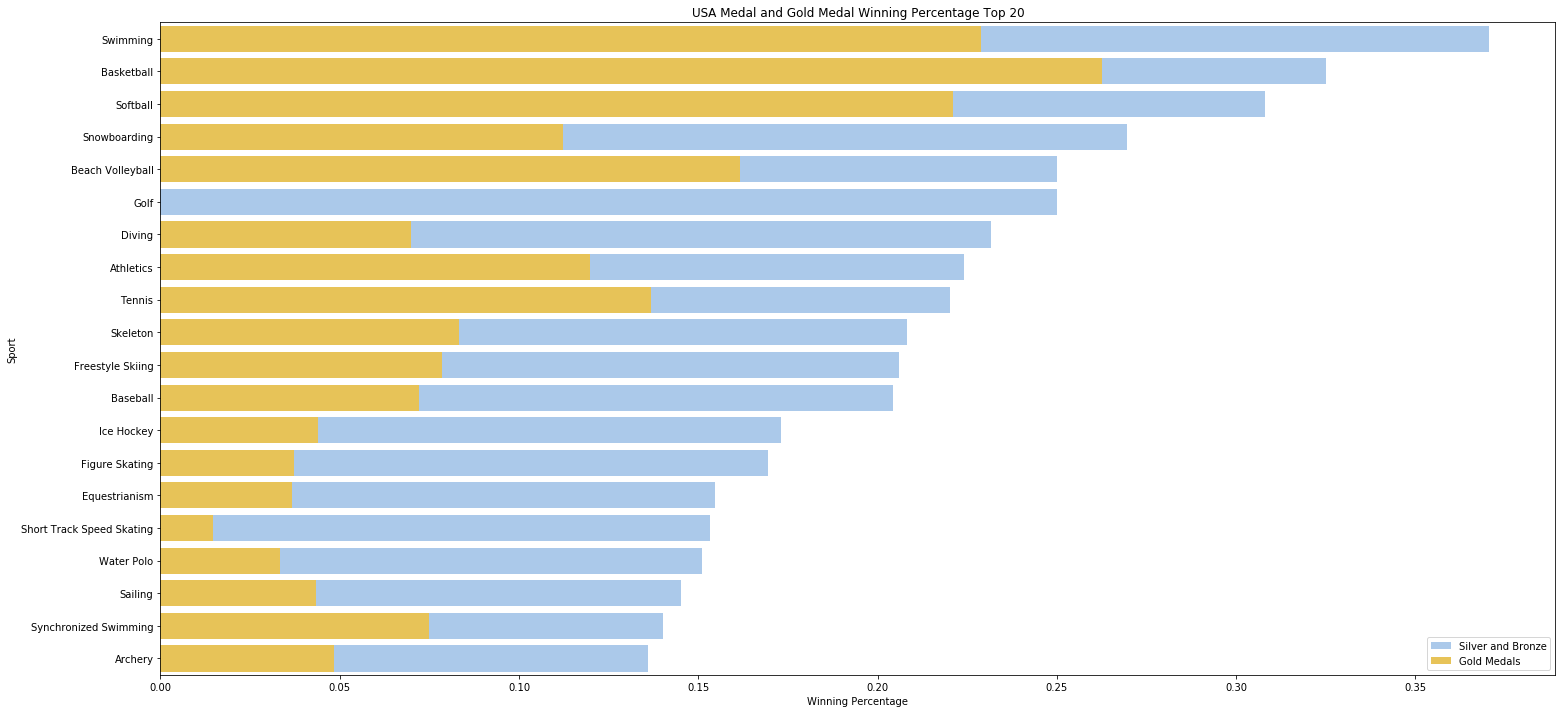

In [10]:
ut.plot_USA(df)

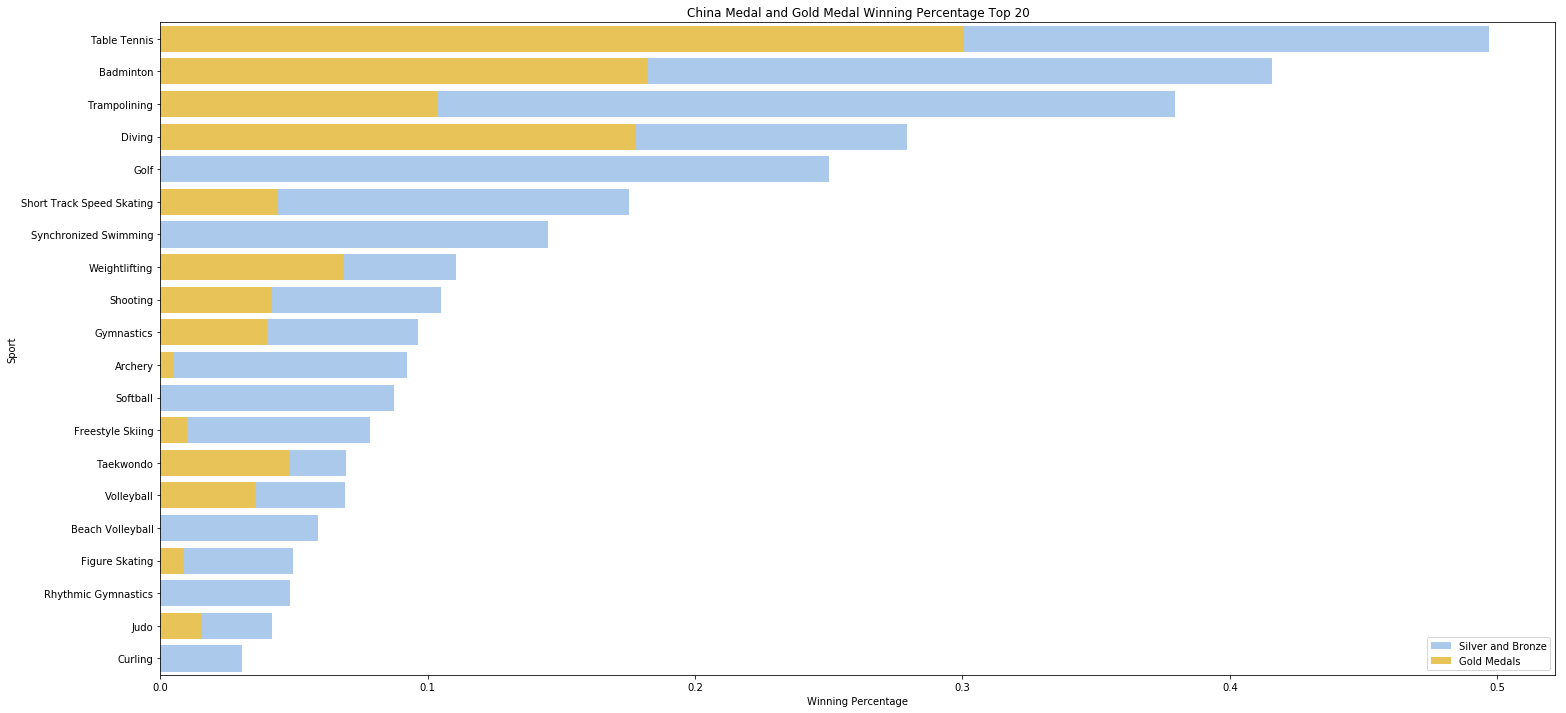

In [12]:
ut.plot_CHN(df)

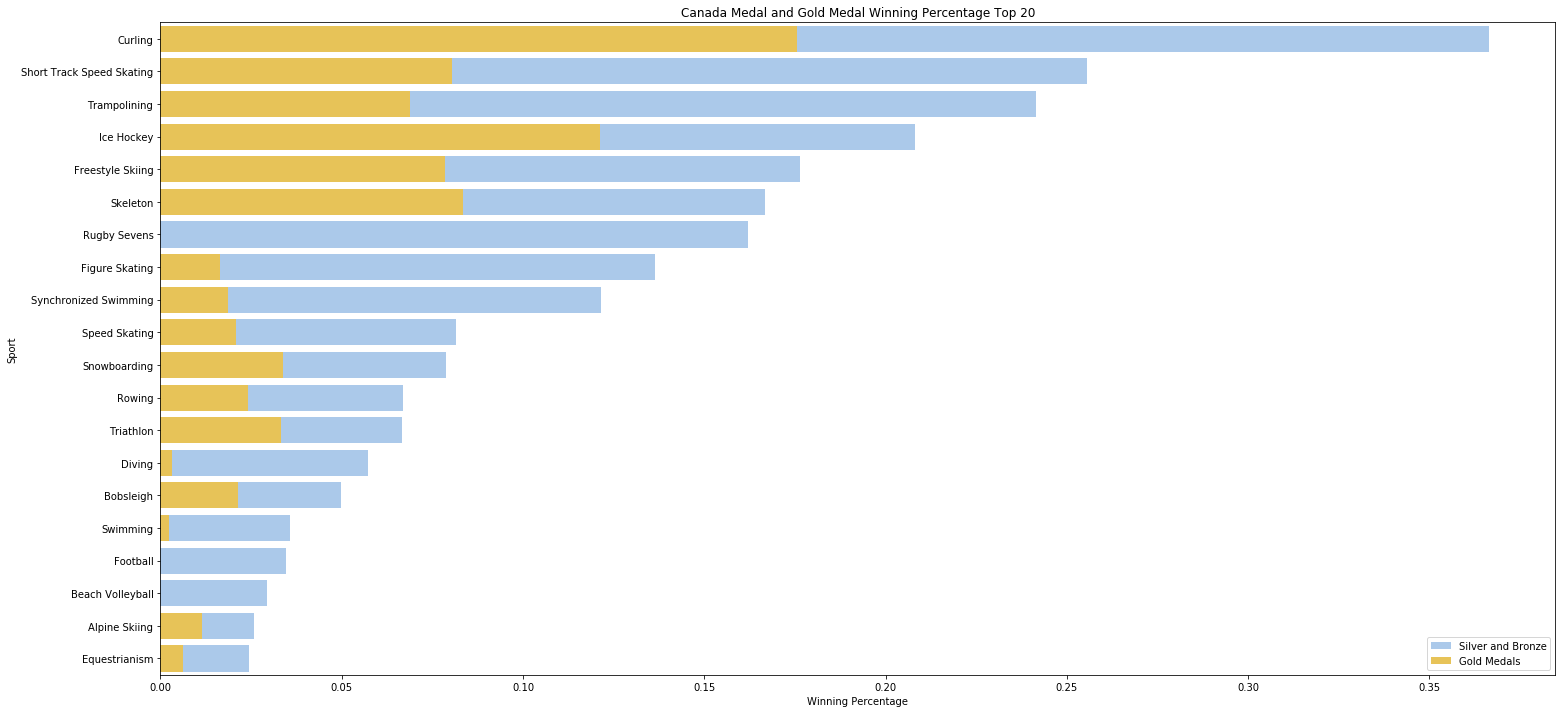

In [13]:
ut.plot_CAN(df)